In [1]:
import sys
sys.path.append("C:/Users/cnava/Repos/PolaPy")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

from polapy.competitiveness import blais_lago, endersby_etal, grofman_selb, navarrete_etal as nav_competition
from polapy.polarization import navarrete_etal as nav_polarization, esteban_ray


In [27]:
df1 = pd.DataFrame([
    ("A", 50, 1), ("B", 50, 1),
    ("A", 50, 2), ("B", 50, 2),
    ("A", 50, 3), ("B", 50, 3),
    ("A", 50, 4), ("B", 50, 4),
    ("A", 50, 5), ("B", 50, 5),
    ("A", 50, 6), ("B", 50, 6)
], columns=["candidate", "votes", "unit"])

# df1 = pd.DataFrame([
#     ("A", 100/3, 1), ("B", 100/3, 1), ("C", 100/3, 1),
#     ("A", 100/3, 2), ("B", 100/3, 2), ("C", 100/3, 2),
#     ("A", 100/3, 3), ("B", 100/3, 3), ("C", 100/3, 3),
#     ("A", 100/3, 4), ("B", 100/3, 4), ("C", 100/3, 4),
#     ("A", 100/3, 5), ("B", 100/3, 5), ("C", 100/3, 5),
#     ("A", 100/3, 6), ("B", 100/3, 6), ("C", 100/3, 6)
# ], columns=["candidate", "votes", "unit"])

df1

,candidate,votes,unit
0,A,50,1
1,B,50,1
2,A,50,2
3,B,50,2
4,A,50,3
5,B,50,3
6,A,50,4
7,B,50,4
8,A,50,5
9,B,50,5


In [26]:
df2 = pd.DataFrame([
    ("A", 100, 1), ("B", 0, 1),
    ("A", 50, 2), ("B", 50, 2),
    ("A", 50, 3), ("B", 50, 3),
    ("A", 50, 4), ("B", 50, 4),
    ("A", 50, 5), ("B", 50, 5),
    ("A", 0, 6), ("B", 100, 6)
], columns=["candidate", "votes", "unit"])

# df2 = pd.DataFrame([
#     ("A", 50, 1), ("B", 50, 1), ("C", 0, 1),
#     ("A", 50, 2), ("B", 50, 2), ("C", 0, 2),
#     ("A", 0, 3), ("B", 50, 3), ("C", 50, 3),
#     ("A", 0, 4), ("B", 50, 4), ("C", 50, 4),
#     ("A", 50, 5), ("B", 0, 5), ("C", 50, 5),
#     ("A", 50, 6), ("B", 0, 6), ("C", 50, 6)
# ], columns=["candidate", "votes", "unit"])

nav_polarization(df2), nav_competition(df2)

((0.3333333333333333,
    candidate  antagonism
  0         A    0.166667
  1         B    0.166667),
 (0.6666666666666666,
    candidate  antagonism
  0         A    0.333333
  1         B    0.333333))

In [28]:
df3 = pd.DataFrame([
    ("A", 100, 1), ("B", 0, 1),
    ("A", 100, 2), ("B", 0, 2),
    ("A", 50, 3), ("B", 50, 3),
    ("A", 50, 4), ("B", 50, 4),
    ("A", 0, 5), ("B", 100, 5),
    ("A", 0, 6), ("B", 100, 6)
], columns=["candidate", "votes", "unit"])

# df3 = pd.DataFrame([
#     ("A", 100, 1), ("B", 0, 1), ("C", 0, 1),
#     ("A", 100/3, 2), ("B", 100/3, 2), ("C", 100/3, 2),
#     ("A", 0, 3), ("B", 100, 3), ("C", 0, 3),
#     ("A", 100/3, 4), ("B", 100/3, 4), ("C", 100/3, 4),
#     ("A", 0, 5), ("B", 0, 5), ("C", 100, 5),
#     ("A", 100/3, 6), ("B", 100/3, 6), ("C", 100/3, 6)
# ], columns=["candidate", "votes", "unit"])

nav_polarization(df3), nav_competition(df3)

((0.6666666666666666,
    candidate  antagonism
  0         A    0.333333
  1         B    0.333333),
 (0.3333333333333333,
    candidate  antagonism
  0         A    0.166667
  1         B    0.166667))

In [29]:
df4 = pd.DataFrame([
    ("A", 100, 1), ("B", 0, 1),
    ("A", 100, 2), ("B", 0, 2),
    ("A", 100, 3), ("B", 0, 3),
    ("A", 0, 4), ("B", 100, 4),
    ("A", 0, 5), ("B", 100, 5),
    ("A", 0, 6), ("B", 100, 6)
], columns=["candidate", "votes", "unit"])

# df4 = pd.DataFrame([
#     ("A", 100, 1), ("B", 0, 1), ("C", 0, 1),
#     ("A", 100, 2), ("B", 0, 2), ("C", 0, 2),
#     ("A", 0, 3), ("B", 100, 3), ("C", 0, 3),
#     ("A", 0, 4), ("B", 100, 4), ("C", 0, 4),
#     ("A", 0, 5), ("B", 0, 5), ("C", 100, 5),
#     ("A", 0, 6), ("B", 0, 6), ("C", 100, 6)
# ], columns=["candidate", "votes", "unit"])

nav_polarization(df4), nav_competition(df4)

((1.0,
    candidate  antagonism
  0         A         0.5
  1         B         0.5),
 (0.0,
    candidate  antagonism
  0         A         0.0
  1         B         0.0))

In [30]:
output = []
for ii, frag in enumerate([df1, df2, df3, df4]):

    frag["share"] = frag.groupby("candidate", group_keys=False)["votes"].apply(lambda x: x/x.sum())

    total = frag.groupby("candidate", group_keys=False).agg({"votes": "sum"})
    total["share"] = total.apply(lambda x: x/x.sum())
    total = total.reset_index()
    item_id = f"({ii + 1})"

    output.append({
        "type": "P",
        "name": "ER (0.25)",
        "value": esteban_ray(total, pi="share", y="votes", alpha=0.25),
        "_id": item_id
    })

    output.append({
        "type": "P",
        "name": "DP",
        "value": frag.groupby("candidate").agg({"share": "std"})["share"].sum(),
        "_id": item_id
    })

    output.append({
        "type": "P",
        "name": "EP",
        "value": nav_polarization(frag)[0],
        "_id": item_id
    })

    output.append({
        "type": "C",
        "name": "EC",
        "value": nav_competition(frag)[0],
        "_id": item_id
    })

    output.append({
        "type": "C",
        "name": "MoV",
        "value": endersby_etal(total),
        "_id": item_id
    })

df = pd.DataFrame(output)
df

,type,name,value,_id
0,P,ER (0.25),0.000000,(1)
1,P,DP,0.000000,(1)
2,P,EP,0.000000,(1)
3,C,EC,1.000000,(1)
4,C,MoV,1.000000,(1)
5,P,ER (0.25),0.000000,(2)
6,P,DP,0.210819,(2)
7,P,EP,0.333333,(2)
8,C,EC,0.666667,(2)
9,C,MoV,1.000000,(2)


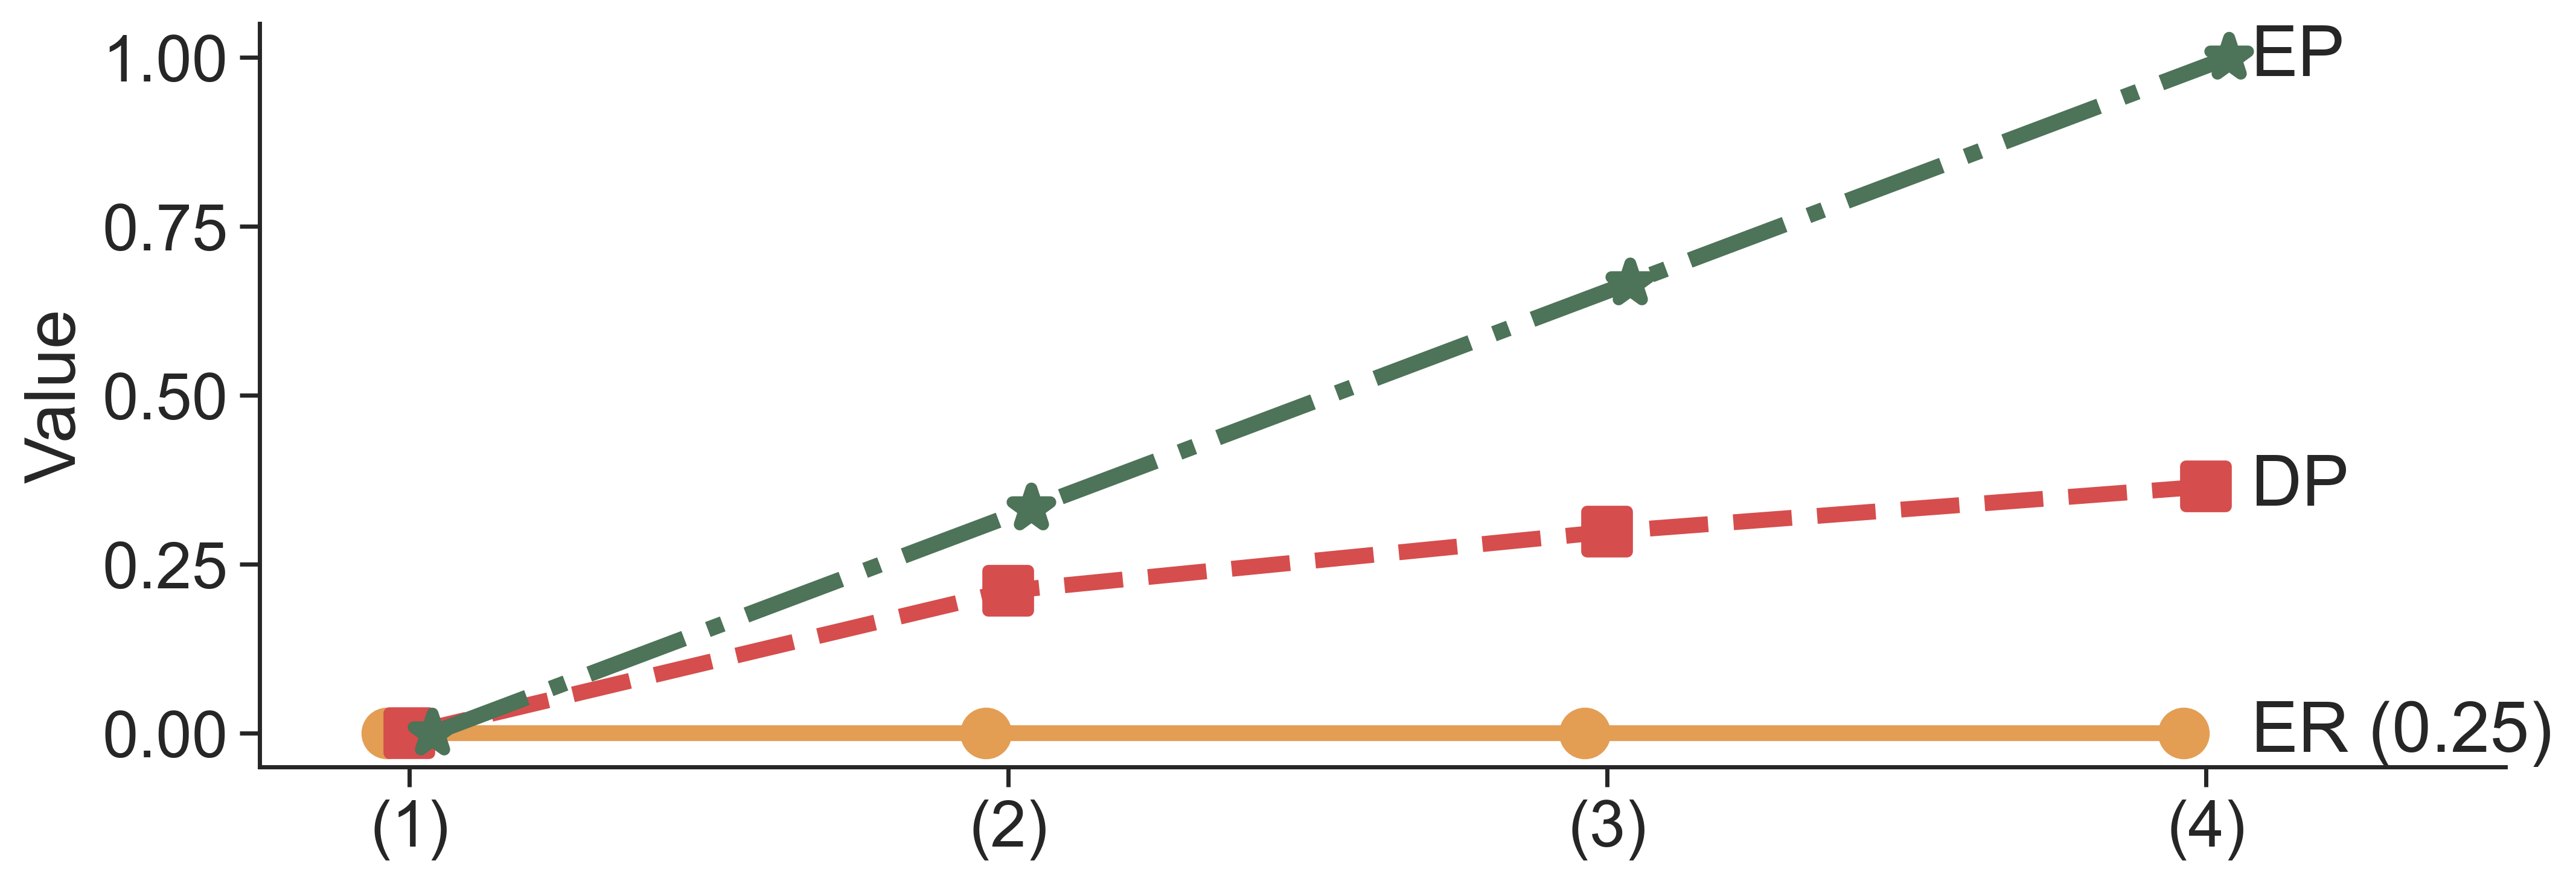

In [32]:
sns.set(font_scale=1.75, style="ticks")
fig, ax = plt.subplots(figsize=(12, 4), dpi=400)

data = df.query("type == 'P'")
sns.pointplot(x="_id", y="value", hue="name", palette=["#e39e54", "#d64d4d", "#4d7358", "#9ed670"], 
              markers=["o", "s", "*"], scale=1.75, linestyles=["-", "--", "-."], data=data, dodge=True, ax=ax)

for ii, item in data.query("_id == '(4)'").iterrows():
    ax.text(3.075, item["value"], item["name"], va="center")

ax.set_xlabel("")
ax.set_ylabel("Value")
ax.set_xbound(-0.25, 3.5)
sns.despine()
leg = ax.legend()
leg.remove()